# **Procesamiento en la Nube - Taller Final**
## **Ingrantes: Felipe Montenegro & Daniel Martínez**
## **Profesor: Daniel Amariles**

# **I. Preparación del Entorno**

In [ ]:
! pip install spark
! pip install pydeequ
! pip install sagemaker-pyspark

  Using cached pyspark-3.3.0-py2.py3-none-any.whl
  Using cached py4j-0.10.9.5-py2.py3-none-any.whl.metadata (1.5 kB)
Using cached py4j-0.10.9.5-py2.py3-none-any.whl (199 kB)
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.3
    Uninstalling py4j-0.10.9.3:
      Successfully uninstalled py4j-0.10.9.3
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.2.1
    Uninstalling pyspark-3.2.1:
      Successfully uninstalled pyspark-3.2.1


In [ ]:
'''!pip uninstall pyspark -y
!pip uninstall pydeequ -y'''

In [ ]:
'''!pip install pyspark==3.2.1
!pip install pydeequ==1.0.1
! pip install sagemaker-pyspark'''

In [ ]:
'''! pip install pydeequ'''

In [ ]:
import os
os.environ["SPARK_VERSION"] = "3.2.1"

import pydeequ
import sagemaker_pyspark
from pyspark.sql import SparkSession

classpath = ":".join(sagemaker_pyspark.classpath_jars())

spark = (SparkSession
    .builder
    .config("spark.driver.extraClassPath", classpath)
    .config("spark.jars.packages", pydeequ.deequ_maven_coord)
    .config("spark.jars.excludes", pydeequ.f2j_maven_coord)
    .getOrCreate())


ERROR:logger:Deequ is still not supported in spark version: 3.2.1


# **II. Carga del Dataset**

**Justificación del conjunto seleccionado:**


Para el desarrollo de este ejercicio se ha seleccionado el dataset Global Weather Repository que proviene de las bases de datos publicadas en Kaggle. Este conjunto de información es relevante debido a la cantidad de registros que contiene (34.719) y la diversidad de columnas y tipo de datos que lo caracterizan.

Entre ellas aparecen variables tipo texto o string como los países o los nombres de las ubicaciones, también variables numéricas como las temperaturas, humedades, presión, entre otras y además, hay información de variables de tiempo, debido a que al ser un dataset que hace seguimiento al clima, se evidencia la fecha en el que se realizaron las mediciones.

Esta estructura permitirá hacer varios ejercicios para el análisis de datos que se propondrá a lo largo del taller.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Maestria_Ciencia_Datos/Semestre_2/Cloud/Taller_Final_Amariles/GlobalWeatherRepository.csv'

df = spark.read.option("header", "true").csv(file_path)
df.printSchema()
df.show(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
root
 |-- country: string (nullable = true)
 |-- location_name: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- timezone: string (nullable = true)
 |-- last_updated_epoch: string (nullable = true)
 |-- last_updated: string (nullable = true)
 |-- temperature_celsius: string (nullable = true)
 |-- temperature_fahrenheit: string (nullable = true)
 |-- condition_text: string (nullable = true)
 |-- wind_mph: string (nullable = true)
 |-- wind_kph: string (nullable = true)
 |-- wind_degree: string (nullable = true)
 |-- wind_direction: string (nullable = true)
 |-- pressure_mb: string (nullable = true)
 |-- pressure_in: string (nullable = true)
 |-- precip_mm: string (nullable = true)
 |-- precip_in: string (nullable = true)
 |-- humidity: string (nullable = true)
 |-- cloud: string (nullable = true)
 |

## **II. Aplicación de Deequ profiling**

En esta sección del ejercicio usaremos la herramienta Deequ Profiling para analizar y comprender la estructura del conjunto de datos escogido. Básicamente se hará un perfilado general de su contenido, valores únicos, valores nulos, etc.

In [ ]:
!pip uninstall pyspark -y
!pip uninstall pydeequ -y

Found existing installation: pyspark 3.3.0
Uninstalling pyspark-3.3.0:
  Successfully uninstalled pyspark-3.3.0
Found existing installation: pydeequ 1.0.1
Uninstalling pydeequ-1.0.1:
  Successfully uninstalled pydeequ-1.0.1


In [ ]:
!pip install pyspark==3.2.1
!pip install pydeequ==1.0.1

  Using cached pyspark-3.2.1-py2.py3-none-any.whl
  Using cached py4j-0.10.9.3-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached py4j-0.10.9.3-py2.py3-none-any.whl (198 kB)
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.5
    Uninstalling py4j-0.10.9.5:
      Successfully uninstalled py4j-0.10.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sagemaker-pyspark 1.4.5 requires pyspark==3.3.0, but you have pyspark 3.2.1 which is incompatible.


  Using cached pydeequ-1.0.1-py3-none-any.whl.metadata (8.5 kB)
Using cached pydeequ-1.0.1-py3-none-any.whl (36 kB)
ERROR: Operation cancelled by user


In [ ]:
! pip install pydeequ

  Using cached pydeequ-1.4.0-py3-none-any.whl.metadata (9.4 kB)
Using cached pydeequ-1.4.0-py3-none-any.whl (37 kB)


In [ ]:
import os
os.environ["SPARK_VERSION"] = "3.2.1"

import pydeequ
import sagemaker_pyspark
from pyspark.sql import SparkSession

classpath = ":".join(sagemaker_pyspark.classpath_jars())

spark = (SparkSession
    .builder
    .config("spark.driver.extraClassPath", classpath)
    .config("spark.jars.packages", pydeequ.deequ_maven_coord)
    .config("spark.jars.excludes", pydeequ.f2j_maven_coord)
    .getOrCreate())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Maestria_Ciencia_Datos/Semestre_2/Cloud/Taller_Final_Amariles/GlobalWeatherRepository.csv'

df = spark.read.option("header", "true").csv(file_path)
df.printSchema()
df.show(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
root
 |-- country: string (nullable = true)
 |-- location_name: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- timezone: string (nullable = true)
 |-- last_updated_epoch: string (nullable = true)
 |-- last_updated: string (nullable = true)
 |-- temperature_celsius: string (nullable = true)
 |-- temperature_fahrenheit: string (nullable = true)
 |-- condition_text: string (nullable = true)
 |-- wind_mph: string (nullable = true)
 |-- wind_kph: string (nullable = true)
 |-- wind_degree: string (nullable = true)
 |-- wind_direction: string (nullable = true)
 |-- pressure_mb: string (nullable = true)
 |-- pressure_in: string (nullable = true)
 |-- precip_mm: string (nullable = true)
 |-- precip_in: string (nullable = true)
 |-- humidity: string (nullable = true)
 |-- cloud: string (nullable = true)
 |

In [ ]:
from pydeequ.profiles import *

result = ColumnProfilerRunner(spark) \
            .onData(df) \
            .run()

In [ ]:
for col, profile in result.profiles.items():
    print(f"Column: '{col}'")
    print(f"{'':>4}completeness: {profile.completeness}")
    print(f"{'':>4}approximate number of distinct values: {profile.approximateNumDistinctValues}")
    print(f"{'':>4}datatype: {profile.dataType}\n")


Column: 'wind_kph'
    completeness: 1.0
    approximate number of distinct values: 153
    datatype: Fractional

Column: 'wind_degree'
    completeness: 1.0
    approximate number of distinct values: 355
    datatype: Integral

Column: 'precip_in'
    completeness: 1.0
    approximate number of distinct values: 55
    datatype: Fractional

Column: 'gust_mph'
    completeness: 1.0
    approximate number of distinct values: 457
    datatype: Fractional

Column: 'air_quality_PM10'
    completeness: 1.0
    approximate number of distinct values: 3369
    datatype: Fractional

Column: 'latitude'
    completeness: 1.0
    approximate number of distinct values: 377
    datatype: Fractional

Column: 'air_quality_Ozone'
    completeness: 1.0
    approximate number of distinct values: 624
    datatype: Fractional

Column: '`air_quality_PM2.5`'
    completeness: 1.0
    approximate number of distinct values: 2204
    datatype: Fractional

Column: 'timezone'
    completeness: 1.0
    approximate 

## **III. Aplicación de Deequ analyzer**



En esta sescción, usaremos la herramienta para realizar una evaluación más elaborada de los datos, utilizando métricas predefinidas para analizar su contenido (media, moda, correlaciones, etc).

In [ ]:
from pydeequ.analyzers import *
from pyspark.sql.functions import col, count, desc

In [ ]:
from pyspark.sql.functions import col

# Debemos asegurarnos que las variables numércias sean realmente numéricas para los ejercicios de correlación

df = df.withColumn("temperature_celsius", col("temperature_celsius").cast("double"))
df = df.withColumn("humidity", col("humidity").cast("double"))
df = df.withColumn("feels_like_celsius", col("feels_like_celsius").cast("double"))
df = df.withColumn("pressure_mb", col("pressure_mb").cast("double"))
df = df.withColumn("precip_mm", col("precip_mm").cast("double"))
df = df.withColumn("visibility_km", col("visibility_km").cast("double"))
df = df.withColumn("uv_index", col("uv_index").cast("double"))

df.printSchema()


root
 |-- country: string (nullable = true)
 |-- location_name: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- timezone: string (nullable = true)
 |-- last_updated_epoch: string (nullable = true)
 |-- last_updated: string (nullable = true)
 |-- temperature_celsius: double (nullable = true)
 |-- temperature_fahrenheit: string (nullable = true)
 |-- condition_text: string (nullable = true)
 |-- wind_mph: string (nullable = true)
 |-- wind_kph: string (nullable = true)
 |-- wind_degree: string (nullable = true)
 |-- wind_direction: string (nullable = true)
 |-- pressure_mb: double (nullable = true)
 |-- pressure_in: string (nullable = true)
 |-- precip_mm: double (nullable = true)
 |-- precip_in: string (nullable = true)
 |-- humidity: double (nullable = true)
 |-- cloud: string (nullable = true)
 |-- feels_like_celsius: double (nullable = true)
 |-- feels_like_fahrenheit: string (nullable = true)
 |-- visibility_km: double (

**Número de Registros**

En el Dataset se identificaron un total de 34.719 registros, que corresponden a la informacion o seguimiento del clima a nivel mundial.


In [ ]:
num_registros = df.count()

print(f"Número de registros en el dataset: {num_registros}")


Número de registros en el dataset: 34719


**Análisis Inicial de las Variables**

Se encontró que la temperatura promedio para los países analizados teniendo en cuenta la última fecha de actualización fue de 25.14 grados. Por su parte, el valor promedio de la humedad es de 61.71.

Adicionalmente, se hizo un ejercicio de evaluar cuál es el Índice de Calidad del Aire que más se repite a lo largo del dataset, el cual correspondió a "1".

In [ ]:
analysis_result = AnalysisRunner(spark) \
    .onData(df) \
    .addAnalyzer(Mean("temperature_celsius")) \
    .addAnalyzer(Mean("humidity")) \
    .run()


analysis_result_df = AnalyzerContext.successMetricsAsDataFrame(spark, analysis_result)
analysis_result_df.show(truncate=False)


mode_air_quality = df.groupBy("air_quality_us-epa-index") \
    .agg(count("air_quality_us-epa-index").alias("count")) \
    .orderBy(desc("count")) \
    .first()


mode_condition_text = df.groupBy("condition_text") \
    .agg(count("condition_text").alias("count")) \
    .orderBy(desc("count")) \
    .first()


print(f"Moda de air_quality_us-epa-index: {mode_air_quality['air_quality_us-epa-index']}")
print(f"Moda de condition_text: {mode_condition_text['condition_text']}")


+------+-------------------+----+------------------+
|entity|instance           |name|value             |
+------+-------------------+----+------------------+
|Column|temperature_celsius|Mean|25.145001296119528|
|Column|humidity           |Mean|61.71197327111956 |
+------+-------------------+----+------------------+

Moda de air_quality_us-epa-index: 1
Moda de condition_text: Partly cloudy


**Revisión de Completitud de las Variables**

Se tomaron de manera aleatoria una lista de variables para revisar la completitud del dataset, en ese ejercicio se identificó que cada una de ellas está al 100%, algo que se presumía debido a que es una dataset proveniente de Kaggle.

In [ ]:
from pydeequ.analyzers import *

analysis_result = AnalysisRunner(spark) \
    .onData(df) \
    .addAnalyzer(Completeness("country")) \
    .addAnalyzer(Completeness("temperature_celsius")) \
    .addAnalyzer(Completeness("condition_text")) \
    .addAnalyzer(Completeness("humidity")) \
    .addAnalyzer(Completeness("cloud")) \
    .addAnalyzer(Completeness("air_quality_Carbon_Monoxide")) \
    .addAnalyzer(Completeness("moon_phase")) \
    .run()

analysis_result_df = AnalyzerContext.successMetricsAsDataFrame(spark, analysis_result)
analysis_result_df.show(truncate=False)


+------+---------------------------+------------+-----+
|entity|instance                   |name        |value|
+------+---------------------------+------------+-----+
|Column|humidity                   |Completeness|1.0  |
|Column|temperature_celsius        |Completeness|1.0  |
|Column|country                    |Completeness|1.0  |
|Column|air_quality_Carbon_Monoxide|Completeness|1.0  |
|Column|cloud                      |Completeness|1.0  |
|Column|condition_text             |Completeness|1.0  |
|Column|moon_phase                 |Completeness|1.0  |
+------+---------------------------+------------+-----+



**Revisión de Correlación**

Haciendo uso del Analyzer, se propusieron una serie de ejercicios de correlación entre algunas de las variables del Dataset. Se mencionarán algunos resultados.

* Temperatura en grados celsius y Humedad

Hay una relación negativa moderada entre la temperatura en grados celsius y la humedad. Es decir, que cuando la temperatura aumenta la humedad disminuye.

* Temperatura en grados celsius y Percepción de la Temperatura en Celsius

Como era de esperarse, hay una relación positiva fuerte entre estas dos variables, pues a medida que aumenta la temperatura real también aumenta la percepción que tienen las personas de la misma.

* Presión Atmosférica y Precipitaciones

Se encontró una relación negativa débil entre estas variables, se esperaba entender si habría alguna relación entre la presión atmosférica y el comportamiento de las precipitaciones.

* Visibilidad y Precipitaciones

Buscando entender si hay alguna relación entre la visibilidad y las condiciones meteorológicas se llevó a cabo esta correlación, sin embargo, no se encontró un resultado concluyente.






In [ ]:
analysis_result = AnalysisRunner(spark) \
    .onData(df) \
    .addAnalyzer(Correlation("temperature_celsius", "humidity")) \
    .addAnalyzer(Correlation("temperature_celsius", "feels_like_celsius")) \
    .addAnalyzer(Correlation("pressure_mb", "precip_mm")) \
    .addAnalyzer(Correlation("visibility_km", "precip_mm")) \
    .addAnalyzer(Correlation("uv_index", "temperature_celsius")) \
    .run()


analysis_result_df = AnalyzerContext.successMetricsAsDataFrame(spark, analysis_result)
analysis_result_df.show(truncate=False)

+-----------+--------------------------------------+-----------+---------------------+
|entity     |instance                              |name       |value                |
+-----------+--------------------------------------+-----------+---------------------+
|Multicolumn|visibility_km,precip_mm               |Correlation|-0.053913157286846834|
|Multicolumn|pressure_mb,precip_mm                 |Correlation|-0.08444269156530587 |
|Multicolumn|temperature_celsius,humidity          |Correlation|-0.43887640288206986 |
|Multicolumn|temperature_celsius,feels_like_celsius|Correlation|0.962228467690046    |
|Multicolumn|uv_index,temperature_celsius          |Correlation|0.5392357392280297   |
+-----------+--------------------------------------+-----------+---------------------+



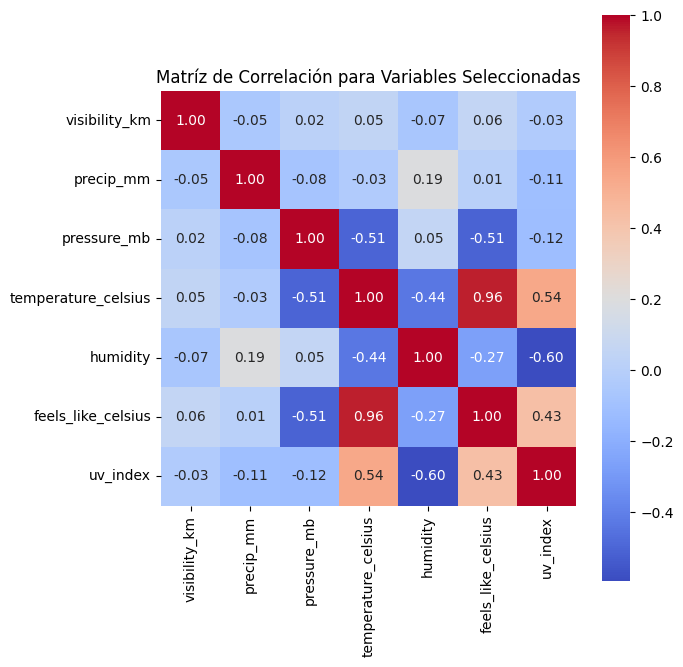

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

values = [
	'visibility_km',
	'precip_mm',
  'pressure_mb',
	'temperature_celsius',
	'humidity',
  'feels_like_celsius',
  'uv_index',
]

selected_data = df.select(values).toPandas()
correlation_matrix = selected_data.corr()

plt.figure(figsize=(7, 7))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar=True)

plt.title("Matríz de Correlación para Variables Seleccionadas")
plt.tight_layout()

plt.show()

**Revisión de Máximos y Mínimos**

* En el análisis propuesto, se encontró que la temperatura más baja registrada es de -12,1 grados celsius, lo que indica que hay países con condiciones climáticas extremadamente frías. También, se encontró que la temperatura más alta registrada es de 49,2 grados celsius.

* En relación con la variable de precipitación, uno de los resultados interesantes que sugieren los datos es que existen lugares en los cuales no se registran lluvias en el periodo de medición. La precipitación más alta fue de 42.24 mm




In [ ]:
analysis_result = AnalysisRunner(spark) \
    .onData(df) \
    .addAnalyzer(Minimum("temperature_celsius")) \
    .addAnalyzer(Maximum("temperature_celsius")) \
    .addAnalyzer(Minimum("precip_mm")) \
    .addAnalyzer(Maximum("precip_mm")) \
    .addAnalyzer(Minimum("wind_degree")) \
    .addAnalyzer(Maximum("wind_degree")) \
    .run()


analysis_result_df = AnalyzerContext.successMetricsAsDataFrame(spark, analysis_result)
analysis_result_df.show(truncate=False)

+------+-------------------+-------+-----+
|entity|instance           |name   |value|
+------+-------------------+-------+-----+
|Column|temperature_celsius|Minimum|-12.1|
|Column|temperature_celsius|Maximum|49.2 |
|Column|precip_mm          |Minimum|0.0  |
|Column|precip_mm          |Maximum|42.24|
+------+-------------------+-------+-----+



## **IV. Aplicación de Deequ Anomaly Detection**

### **Ejercicio de Detección # 1**

En esta primera aproximación, se decidió implementar una regla de negocio para el dataset propuesto, la cual establece que los datos nuevos que ingresan al conjunto de información no pueden ser inferiores a 20.000 registros.

Es importante mencionar que, para este ejercicio se han tomado como datos históricos los primeros 30.000 registros de la base de datos, mientras que los registros restantes se han considerado como datos nuevos.

In [ ]:
!pip install pydeequ


In [ ]:
from pyspark.sql import SparkSession, Row
import pydeequ
from pydeequ.repository import *
from pydeequ.verification import *
from pydeequ.analyzers import Size
from pydeequ.anomaly_detection import AbsoluteChangeStrategy

# Sesión de Spark

spark = (SparkSession
    .builder
    .config("spark.jars.packages", pydeequ.deequ_maven_coord)
    .config("spark.jars.excludes", pydeequ.f2j_maven_coord)
    .getOrCreate())
sc = spark.sparkContext


from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/MyDrive/Maestria_Ciencia_Datos/Semestre_2/Cloud/Taller_Final_Amariles/GlobalWeatherRepository.csv'
df = spark.read.option("header", "true").csv(file_path)
df.printSchema()
df.show(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
root
 |-- country: string (nullable = true)
 |-- location_name: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- timezone: string (nullable = true)
 |-- last_updated_epoch: string (nullable = true)
 |-- last_updated: string (nullable = true)
 |-- temperature_celsius: string (nullable = true)
 |-- temperature_fahrenheit: string (nullable = true)
 |-- condition_text: string (nullable = true)
 |-- wind_mph: string (nullable = true)
 |-- wind_kph: string (nullable = true)
 |-- wind_degree: string (nullable = true)
 |-- wind_direction: string (nullable = true)
 |-- pressure_mb: string (nullable = true)
 |-- pressure_in: string (nullable = true)
 |-- precip_mm: string (nullable = true)
 |-- precip_in: string (nullable = true)
 |-- humidity: string (nullable = true)
 |-- cloud: string (nullable = true)
 |

En este punto, se hace la división del dataset para simular los datos históricos y los datos nuevos.

In [ ]:
historical_data = df.limit(30000)
new_data = df.subtract(historical_data)

print("Datos Históricos:")
historical_data.show(5, truncate=False)

print("Datos Nuevos:")
new_data.show(5, truncate=False)


Datos Históricos:
+-----------+----------------+--------+---------+--------------+------------------+----------------+-------------------+----------------------+--------------+--------+--------+-----------+--------------+-----------+-----------+---------+---------+--------+-----+------------------+---------------------+-------------+----------------+--------+--------+--------+---------------------------+-----------------+----------------------------+---------------------------+-----------------+----------------+------------------------+--------------------------+--------+--------+--------+--------+--------------+-----------------+
|country    |location_name   |latitude|longitude|timezone      |last_updated_epoch|last_updated    |temperature_celsius|temperature_fahrenheit|condition_text|wind_mph|wind_kph|wind_degree|wind_direction|pressure_mb|pressure_in|precip_mm|precip_in|humidity|cloud|feels_like_celsius|feels_like_fahrenheit|visibility_km|visibility_miles|uv_index|gust_mph|gust_kph|

In [ ]:
metricsRepository = InMemoryMetricsRepository(spark)


In [ ]:
historicalKey = ResultKey(spark, ResultKey.current_milli_time())

historicalResult = VerificationSuite(spark).onData(historical_data) \
    .useRepository(metricsRepository) \
    .saveOrAppendResult(historicalKey) \
    .addAnomalyCheck(AbsoluteChangeStrategy(maxRateDecrease=20000.0), Size()) \
    .run()


In [ ]:
newKey = ResultKey(spark, ResultKey.current_milli_time())

newResult = VerificationSuite(spark).onData(new_data) \
    .useRepository(metricsRepository) \
    .saveOrAppendResult(newKey) \
    .addAnomalyCheck(AbsoluteChangeStrategy(maxRateDecrease=20000.0), Size()) \
    .run()


En este caso, por la simulación previa se encontró una anomalía en los datos nuevos, dado que el dataset contiene una cantidad de registros inferior a 20.000

In [ ]:
if newResult.status == "Success":
    print("No se detectaron anomalías en la métrica configurada -> Size().")
else:
    print("¡Anomalía detectada en la métrica configurada -> Size()!")

# Mostrar las métricas de éxito
metricsRepository.load().forAnalyzers([Size()]).getSuccessMetricsAsDataFrame().show()


¡Anomalía detectada en la métrica configurada -> Size()!
+-------+--------+----+-------+-------------+
| entity|instance|name|  value| dataset_date|
+-------+--------+----+-------+-------------+
|Dataset|       *|Size|30000.0|1731465869740|
|Dataset|       *|Size| 4719.0|1731465872946|
+-------+--------+----+-------+-------------+



### **Ejercicio de Detección # 2**

En esta segunda aproximación, se decidió implementar una regla de negocio para el dataset propuesto, la cual establece que los datos nuevos que ingresan al conjunto de información no pueden tener una estructura diferente a la histórica, es decir, tanto los datos nuevos como históricos deben tener la misma cantidad de columnas.

In [ ]:
from pyspark.sql import SparkSession, Row
import pydeequ
from pydeequ.repository import *
from pydeequ.verification import *
from pydeequ.analyzers import Completeness


spark = (SparkSession
    .builder
    .config("spark.jars.packages", pydeequ.deequ_maven_coord)
    .config("spark.jars.excludes", pydeequ.f2j_maven_coord)
    .getOrCreate())
sc = spark.sparkContext


from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/MyDrive/Maestria_Ciencia_Datos/Semestre_2/Cloud/Taller_Final_Amariles/GlobalWeatherRepository.csv'
df = spark.read.option("header", "true").csv(file_path)
df.printSchema()
df.show(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
root
 |-- country: string (nullable = true)
 |-- location_name: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- timezone: string (nullable = true)
 |-- last_updated_epoch: string (nullable = true)
 |-- last_updated: string (nullable = true)
 |-- temperature_celsius: string (nullable = true)
 |-- temperature_fahrenheit: string (nullable = true)
 |-- condition_text: string (nullable = true)
 |-- wind_mph: string (nullable = true)
 |-- wind_kph: string (nullable = true)
 |-- wind_degree: string (nullable = true)
 |-- wind_direction: string (nullable = true)
 |-- pressure_mb: string (nullable = true)
 |-- pressure_in: string (nullable = true)
 |-- precip_mm: string (nullable = true)
 |-- precip_in: string (nullable = true)
 |-- humidity: string (nullable = true)
 |-- cloud: string (nullable = true)
 |

En este punto se lleva a cabo la simulación para poder revisar el ejercicio de detección de anomalía más adelante. En este punto se decidió eliminar la columna 'country'.

In [ ]:

historical_data = df.limit(30000)
new_data = df.subtract(historical_data)


new_data = new_data.drop('country')


print("Datos Históricos:")
historical_data.show(5, truncate=False)

print("Datos Nuevos (sin columna 'country'):")
new_data.show(5, truncate=False)


Datos Históricos:
+-----------+----------------+--------+---------+--------------+------------------+----------------+-------------------+----------------------+--------------+--------+--------+-----------+--------------+-----------+-----------+---------+---------+--------+-----+------------------+---------------------+-------------+----------------+--------+--------+--------+---------------------------+-----------------+----------------------------+---------------------------+-----------------+----------------+------------------------+--------------------------+--------+--------+--------+--------+--------------+-----------------+
|country    |location_name   |latitude|longitude|timezone      |last_updated_epoch|last_updated    |temperature_celsius|temperature_fahrenheit|condition_text|wind_mph|wind_kph|wind_degree|wind_direction|pressure_mb|pressure_in|precip_mm|precip_in|humidity|cloud|feels_like_celsius|feels_like_fahrenheit|visibility_km|visibility_miles|uv_index|gust_mph|gust_kph|

In [ ]:
metricsRepository = InMemoryMetricsRepository(spark)


In [ ]:
from pydeequ.anomaly_detection import RelativeRateOfChangeStrategy

historicalKey = ResultKey(spark, ResultKey.current_milli_time())

historicalResult = VerificationSuite(spark).onData(historical_data) \
    .useRepository(metricsRepository) \
    .saveOrAppendResult(historicalKey) \
    .addAnomalyCheck(RelativeRateOfChangeStrategy(maxRateIncrease=2.0), Completeness('country')) \
    .run()


In [ ]:
newKey = ResultKey(spark, ResultKey.current_milli_time())

newResult = VerificationSuite(spark).onData(new_data) \
    .useRepository(metricsRepository) \
    .saveOrAppendResult(newKey) \
    .addAnomalyCheck(RelativeRateOfChangeStrategy(maxRateIncrease=2.0), Completeness('country')) \
    .run()


En este caso, teniendo en cuenta la simulación que se generó previamente donde se eliminó la columna, en este punto se encontró una anomalía por la ausencia de la variable 'country' en el dataset con datos nuevos.

In [ ]:
if newResult.status == "Success":
    print("No se detectaron anomalías en la métrica configurada -> Completeness('country').")
else:
    print("¡Anomalía detectada en la métrica configurada -> Completeness('country')!")

# Mostrar las métricas de éxito
metricsRepository.load().forAnalyzers([Completeness('country')]).getSuccessMetricsAsDataFrame().show()


¡Anomalía detectada en la métrica Completeness('country')!
+------+--------+------------+-----+-------------+
|entity|instance|        name|value| dataset_date|
+------+--------+------------+-----+-------------+
|Column| country|Completeness|  1.0|1731466204212|
+------+--------+------------+-----+-------------+

